# 06 - QUEEN-NOQUEEN - Dimensionality Reduction

## Prerequisites

- The dataset exists (if not, execute 00 - Dataset Initialisation)
- The dataset features have been populated (if not, execute 02 - Features Computation)


In [1]:
import warnings                              # This block prevents display of harmless warnings, but should be
warnings.filterwarnings('ignore')            # commented out till the experiment final version,
                                             # in order to avoid missing "real" warnings 
from IPython.display import display
import kilroy_was_here                       # Mandatory. Allow access to shared python code from repository root
from audace.jupytools import iprint
from audace.audiodataset import AudioDataset # Main class for audio dataset handling

# Experiment name will be used to prefix potential outputs
EXP_NAME = "03 - QUEEN-NOQUEEN - Dimensionality Reduction"

# Dataset name is the master key for dataset adressing
# Change it according to the dataset you want to process
DATASET_NAME = 'MAIN1000'

# Initialize Dataset Object. 
ds = AudioDataset(DATASET_NAME)
    
# Display AudioDataset summary    
ds.info()


[2020-08-24/21:02:11.402|15.9%|68.4%|0.26GB] ------------------------------------------------------
[2020-08-24/21:02:11.402|00.0%|68.4%|0.26GB] DATASET NAME          : MAIN1000
[2020-08-24/21:02:11.402|00.0%|68.4%|0.26GB] DATASET PATH          : D:\Jupyter\ShowBees\datasets\MAIN1000
[2020-08-24/21:02:11.402|00.0%|68.4%|0.26GB] DATASET DB PATH       : D:\Jupyter\ShowBees\datasets\MAIN1000\MAIN1000.db
[2020-08-24/21:02:11.402|00.0%|68.4%|0.26GB] DATASET SAMPLES PATH  : D:\Jupyter\ShowBees\datasets\MAIN1000\samples
[2020-08-24/21:02:11.402|00.0%|68.4%|0.26GB] NB SOURCE AUDIO FILES : 48
[2020-08-24/21:02:11.403|00.0%|68.4%|0.26GB] SAMPLE RATE           : 22050
[2020-08-24/21:02:11.403|00.0%|68.4%|0.26GB] DURATION              : 1.0
[2020-08-24/21:02:11.403|00.0%|68.4%|0.26GB] OVERLAP               : 0.0
[2020-08-24/21:02:11.403|00.0%|68.4%|0.26GB] NB AUDIO CHUNKS       : 24788
[2020-08-24/21:02:11.403|00.0%|68.4%|0.26GB] ------------------------------------------------------


In [5]:
import numpy as np
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from audace.jupytools import predestination
from audace.audiodataset import feature_serie_to_flat_np

# Experiment parameters
FEATURE_NAME = 'mfcc20'
SET_FRAC = 1

# Seed the various PRNGs
predestination()

# Get pandas dataframe containing the columns we will need for this experiment,
# shuffle it (and potentially truncate it to speed quick tests)
iprint(">>>>> Query features and labels")
sql = F"select {FEATURE_NAME}, queen from samples where nobee = 0"
df = ds.queryDataFrame(sql).sample(frac=SET_FRAC)

# flatten features array
iprint(">>>>> Flatten features")
X = feature_serie_to_flat_np(df[FEATURE_NAME])

# get labels
y = df['queen']

# It is usually a good idea to scale the data for SVM training. Classifiers usually
#perform better on normalized data
iprint(">>>>> Scale")
scaler = StandardScaler()
iprint("      fit transform X")
X_scaled = scaler.fit_transform(X)


# now reduce dimensionality using PCA
iprint(">>>>> PCA")
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

iprint(">>>>> UMAP")
X_umap = umap.UMAP().fit_transform(X)

# reduce dimensionality using t-sne
iprint(">>>>> t-SNE")
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)


[2020-08-24/21:04:05.155|15.1%|69.3%|0.42GB] >>>>> Query features and labels
[2020-08-24/21:04:05.469|14.9%|71.1%|0.42GB] >>>>> Flatten features
[2020-08-24/21:04:05.516|17.4%|71.8%|0.47GB] >>>>> Scale
[2020-08-24/21:04:05.516|00.0%|71.8%|0.47GB]       fit transform X
[2020-08-24/21:04:05.829|15.5%|72.5%|0.52GB] >>>>> PCA
[2020-08-24/21:04:06.032|38.5%|72.5%|0.53GB] >>>>> UMAP
[2020-08-24/21:04:24.261|35.1%|70.9%|0.55GB] >>>>> t-SNE


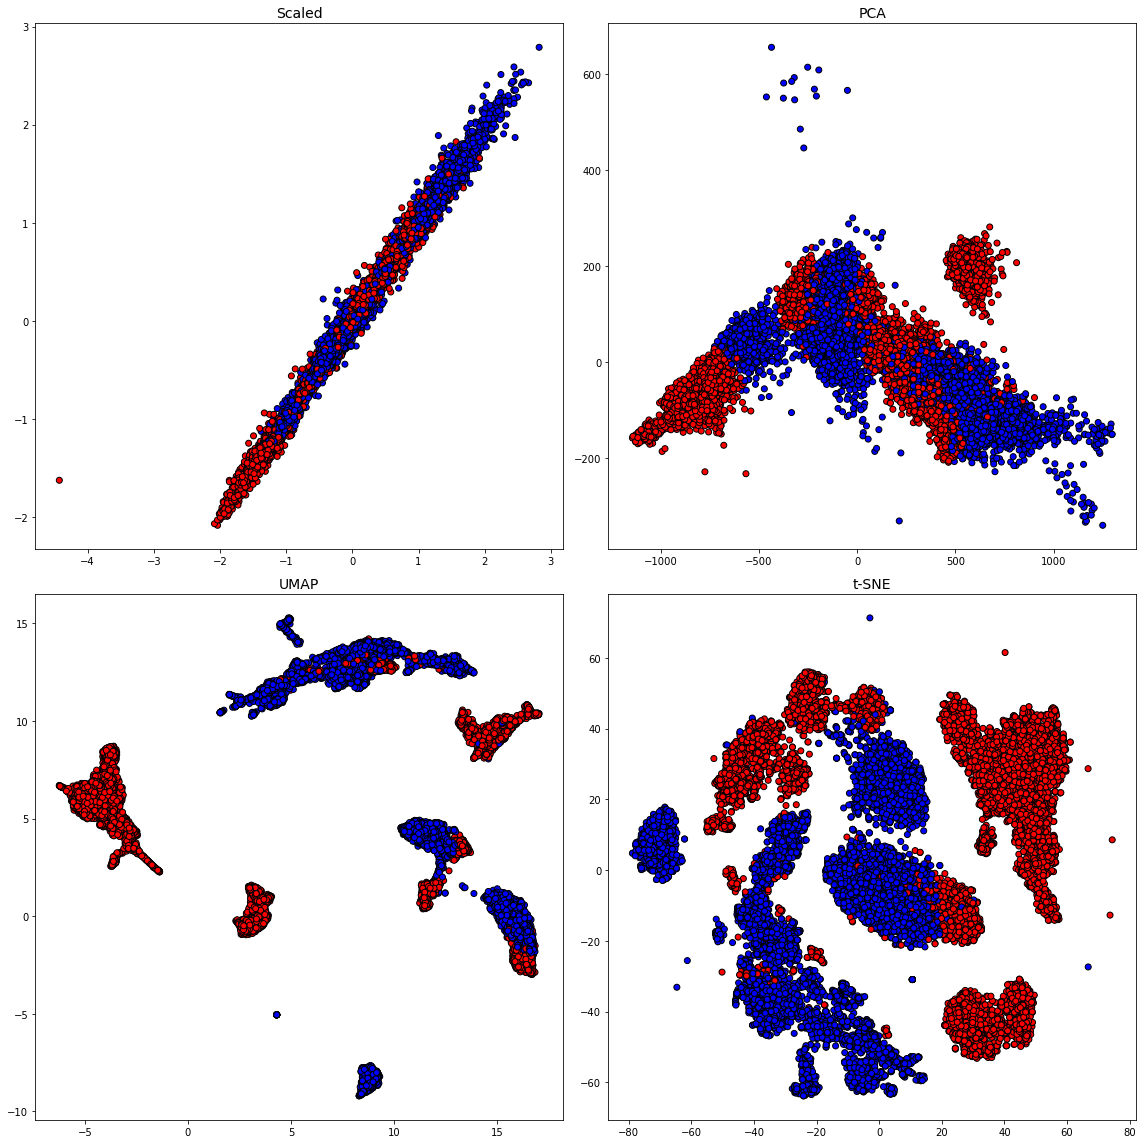

In [6]:
import matplotlib.pyplot as plt
from audace.plotters import save_fig

def plot_samples(title, X, y):
    plt.title(title, fontsize=14)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
    plt.axis('tight')
    
plt.figure(figsize=(16, 16))
plt.subplot(221)
plot_samples("Scaled", X_scaled, y)
plt.subplot(222)
plot_samples("PCA", X_pca, y)
plt.subplot(223)
plot_samples("UMAP", X_umap, y)
plt.subplot(224)
plot_samples("t-SNE", X_tsne, y)

save_fig(EXP_NAME, 'Dim-Red grid')